In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Bond:
    def __init__(self, principal, interest_rate, maturity_date):
        self.principal = principal
        self.interest_rate = interest_rate
        self.maturity_date = maturity_date

    def calculate_payment(self):
        # Return principal + interest at maturity
        return self.principal * (1 + self.interest_rate)


class CallOption:
    def __init__(self, strike_price, premium, expiration_date):
        self.strike_price = strike_price
        self.premium = premium
        self.expiration_date = expiration_date

    def calculate_payoff(self, market_price):
        # Payoff is max(market price - strike price, 0)
        return max(market_price - self.strike_price, 0) - self.premium


class CapitalProtectionProduct:
    def __init__(self, principal, bond_interest_rate, bond_maturity_date, call_strike_price, call_premium, call_expiration_date):
        self.principal = principal
        self.min_bond_investment = principal/(1+bond_interest_rate)

        # Ensure the call option premium does not exceed 5% of principal
        if call_premium > 0.05 * principal:
            self.bond_investment = principal
            self.n_calls = 0
        else:
            self.n_calls = min(0.05*principal, bond_interest_rate*principal/(1+bond_interest_rate))//call_premium
            self.bond_investment = principal - self.n_calls*call_premium

        # Create bond and call option components
        self.bond = Bond(self.bond_investment, bond_interest_rate, bond_maturity_date)
        self.call_option = CallOption(call_strike_price, call_premium, call_expiration_date)

    def calculate_capital_protection(self):
        # At maturity, return the bond payment and the payoff from the call option
        bond_payment = self.bond.calculate_payment()
        return bond_payment

    def calculate_total_payoff(self, market_price):
        # Total payoff is bond payment + call option payoff
        bond_payment = self.bond.calculate_payment()
        call_payoff = self.n_calls*self.call_option.calculate_payoff(market_price)
        return bond_payment + call_payoff, self.n_calls





In [10]:
# Example usage
# Principal: $1,000, Bond rate: 5%, Bond maturity: 1 year
# Call option: Strike price $1,100, Premium $50, Expiration: 1 year
principal = 1000
bond_interest_rate = 0.05
bond_maturity_date = "2025-12-19"
call_strike_price = 1100
call_premium = 10  # Ensure this is <= 5% of principal (50)
call_expiration_date = "2025-12-19"

capital_protection = CapitalProtectionProduct(
    principal,
    bond_interest_rate,
    bond_maturity_date,
    call_strike_price,
    call_premium,
    call_expiration_date
)

# Calculate total payoff if market price is $1,200
market_price = 1200

total_payoff, n_calls = capital_protection.calculate_total_payoff(market_price)
print("Number of calls:", n_calls)
print("Capital protection value at maturity:", capital_protection.calculate_capital_protection())
print("Total payoff including call option:", total_payoff)

Number of calls: 4.0
Capital protection value at maturity: 1008.0
Total payoff including call option: 1368.0


#### I am modelling after on time period (say 1 year). The key variables are therefore:
* principal (P)
* bond interest rate (r)
* call strike price (k)
* call premium (c)
* marke price (m)

This can be further reduced to 4 key variables by normalizing all the prices with the principal price, P, i.e., assuming P =1 and k,c are expressed in units of P. Below, I model the effect of:
* bond interest rate (r)
* call strike price ̃k = k/P
* call premium c̃ = c/P.
* market price m̃ = m/P

For the sake of convenience, I drop the tilde notation and use k,c,m in place of k̃, c̃, and m̃. But please keep in mind that they are dimentionless numbers (normalized wrt P)


## Variaion of bond_interest rate (r)




In [29]:
r_list = np.linspace(0.01,0.5,100)
c_list = np.linspace(0.01,0.06,100)
k_list = m_list = np.linspace(0.01,2,200)

# For the sake of understanding, let us study one variable a time.
principal = 1
market_price = 1.1
call_strike_price = 1.2
call_premium = 0.010  # Ensure this is <= 5% of principal (50)
bond_maturity_date = "2025-12-19"
call_expiration_date = "2025-12-19"
total_payoff_list = []
n_calls_list = []
bond_payment_list = []

for r in r_list:
    capital_protection = CapitalProtectionProduct(
        principal,
        r,
        bond_maturity_date,
        call_strike_price,
        call_premium,
        call_expiration_date
    )
    total_payoff, n_calls = capital_protection.calculate_total_payoff(market_price)
    total_payoff_list.append(total_payoff)
    n_calls_list.append(n_calls)
    bond_payment_list.append(capital_protection.calculate_capital_protection())

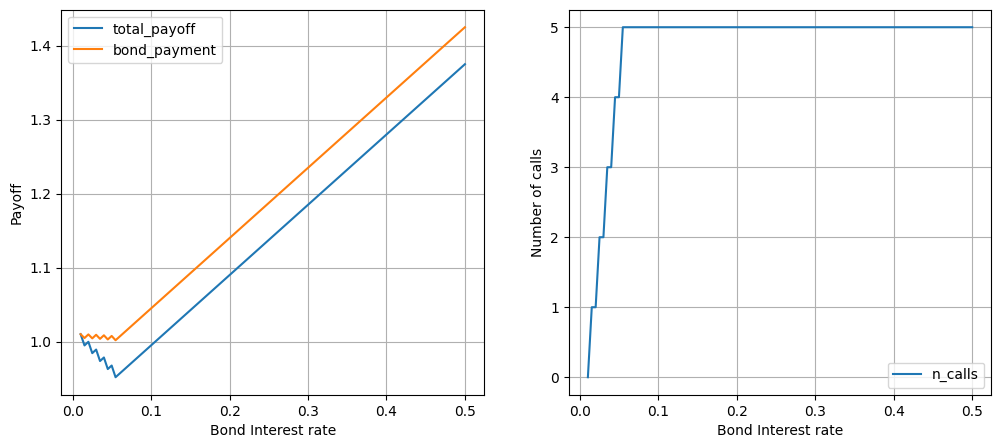

In [30]:
def pair_plot(x_list,total_payoff_list,bond_payment_list,n_calls_list,label="Bond Interest rate"):
  fig,axs = plt.subplots(1,2,figsize=(12,5))
  axs[0].plot(x_list,total_payoff_list,label="total_payoff")
  axs[0].plot(x_list,bond_payment_list,label="bond_payment")
  axs[0].legend()
  axs[0].set_xlabel(label)
  axs[0].set_ylabel("Payoff")
  axs[0].grid(visible=True)
  axs[1].plot(x_list,n_calls_list,label="n_calls")
  axs[1].legend()
  axs[1].set_xlabel(label)
  axs[1].set_ylabel("Number of calls")
  axs[1].grid(visible=True)
  fig.show()

pair_plot(r_list,total_payoff_list,bond_payment_list,n_calls_list)

## Variaion of call_strike price (k)




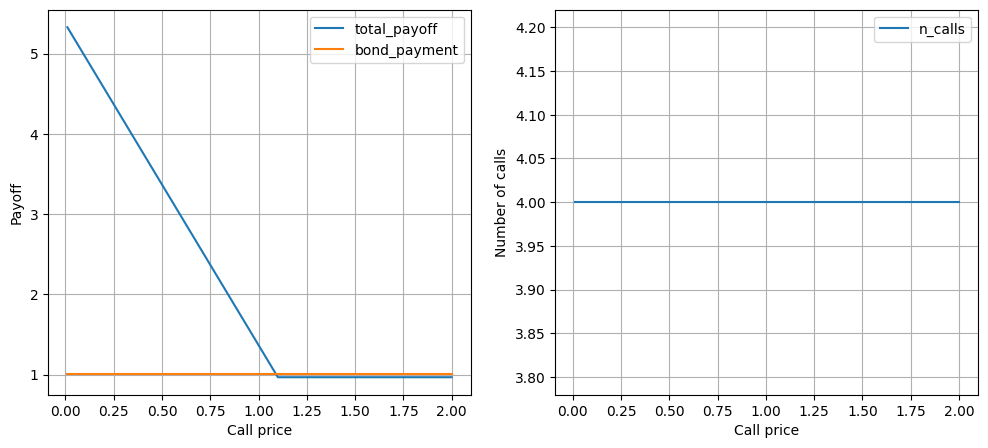

In [31]:
# For the sake of understanding, let us study one variable a time.
principal = 1
market_price = 1.1
#call_strike_price = 1.2
bond_interest_rate = 0.05
call_premium = 0.010  # Ensure this is <= 5% of principal (50)
bond_maturity_date = "2025-12-19"
call_expiration_date = "2025-12-19"
total_payoff_list = []
n_calls_list = []
bond_payment_list = []

for k in k_list:
    capital_protection = CapitalProtectionProduct(
        principal,
        bond_interest_rate,
        bond_maturity_date,
        k,
        call_premium,
        call_expiration_date
    )
    total_payoff, n_calls = capital_protection.calculate_total_payoff(market_price)
    total_payoff_list.append(total_payoff)
    n_calls_list.append(n_calls)
    bond_payment_list.append(capital_protection.calculate_capital_protection())

pair_plot(k_list,total_payoff_list,bond_payment_list,n_calls_list,label="Call price")

## Variaion of call_premium (c)

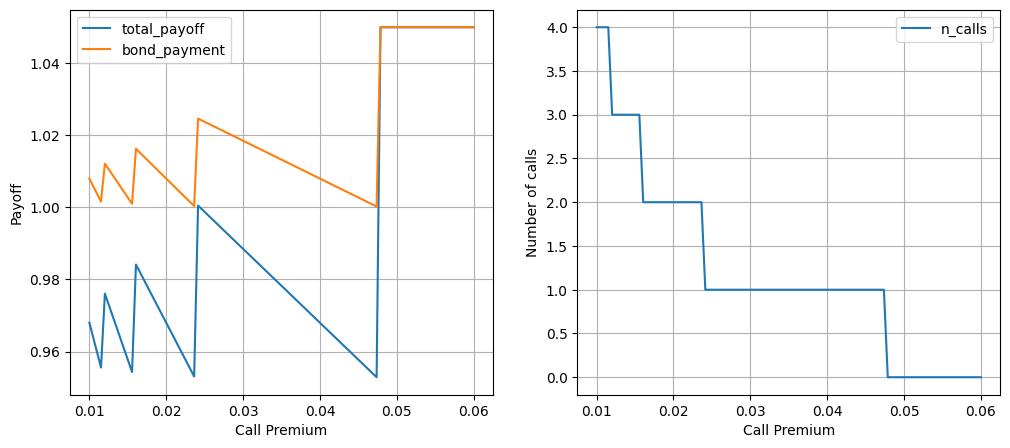

In [32]:
# For the sake of understanding, let us study one variable a time.
principal = 1
market_price = 1.1
call_strike_price = 1.2
bond_interest_rate = 0.05
#call_premium = 0.010  # Ensure this is <= 5% of principal (50)
bond_maturity_date = "2025-12-19"
call_expiration_date = "2025-12-19"
total_payoff_list = []
n_calls_list = []
bond_payment_list = []

for c in c_list:
    capital_protection = CapitalProtectionProduct(
        principal,
        bond_interest_rate,
        bond_maturity_date,
        call_strike_price,
        c,
        call_expiration_date
    )
    total_payoff, n_calls = capital_protection.calculate_total_payoff(market_price)
    total_payoff_list.append(total_payoff)
    n_calls_list.append(n_calls)
    bond_payment_list.append(capital_protection.calculate_capital_protection())

pair_plot(c_list,total_payoff_list,bond_payment_list,n_calls_list,label="Call Premium")

## Variation of market price (m)

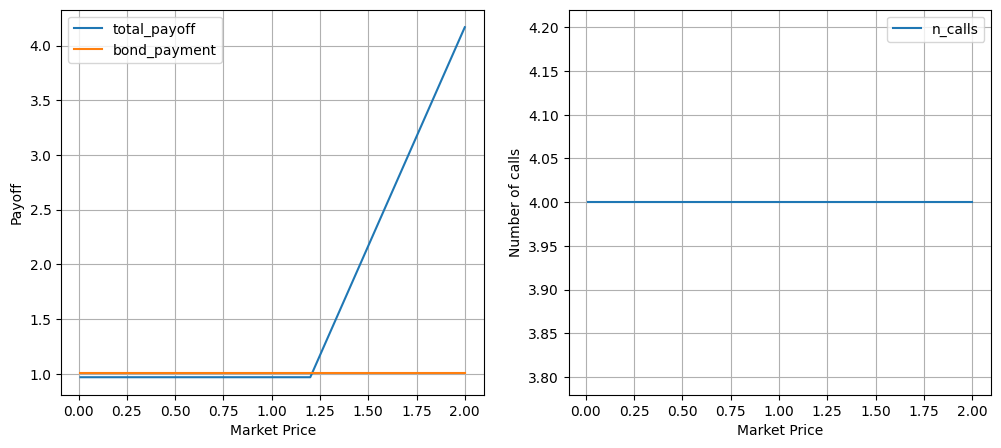

In [34]:
# For the sake of understanding, let us study one variable a time.
principal = 1
#market_price = 1.1
call_strike_price = 1.2
bond_interest_rate = 0.05
call_premium = 0.010  # Ensure this is <= 5% of principal (50)
bond_maturity_date = "2025-12-19"
call_expiration_date = "2025-12-19"
total_payoff_list = []
n_calls_list = []
bond_payment_list = []

for m in m_list:
    capital_protection = CapitalProtectionProduct(
        principal,
        bond_interest_rate,
        bond_maturity_date,
        call_strike_price,
        call_premium,
        call_expiration_date
    )
    total_payoff, n_calls = capital_protection.calculate_total_payoff(m)
    total_payoff_list.append(total_payoff)
    n_calls_list.append(n_calls)
    bond_payment_list.append(capital_protection.calculate_capital_protection())

pair_plot(m_list,total_payoff_list,bond_payment_list,n_calls_list,label="Market Price")